In [77]:
#Topic 1
import random
import matplotlib.pyplot as plt
import numpy as np
student_id = 1533
birth_month = 12

In [78]:
#Define the properties of the player
class Player():
    #Generate player, take the birthmonth as prob. to init. action 1
    def __init__(self,probability):
        self.prob = probability
        self.histpay = [] #a list to keep payoffs' records
    #Define a method -> choice of action
    def choice(self):
        if random.uniform(0,1) < self.prob: #pay att. to the sign ><
            self.act = 1
        else:
            self.act = 0
    #Define a method -> update the histpay
    def update_histpay(self):
        self.histpay.append(self.payoff)

#Define a method to make a list of moving averages 
def movAve(hist):
    cumSum = 0 #Initial record of the cummulative sum
    histMV = [] #Initial list to record the moving averages
    for i in range(len(hist)):
        cumSum += hist[i] #Add the i-th entry in hist to cumSum
        histMV.append(cumSum/(i+1)) #append the moving average from 0th to i-th entries to moving averages list
    return histMV #the list is the output of this method

#Setup the game
#Generate the payoff matrix based on student inputs
a0 = int(str(student_id)[0])
a1 = int(str(student_id)[1])
b0 = int(str(student_id)[2])
b1 = int(str(student_id)[3])
payoff_matrix = [[a0,a1],[b0,b1]]
#The payoff associated with the actions
def payoff_fn(action1,action2):
    payoff1 = payoff_matrix[action1][action2]
    payoff2 = payoff_matrix[action2][action1] #p2's payoff is mirrored with p1
    return payoff1, payoff2 #the 2 payoffs are the output, the inputs are action
print(f'Payoff matrix: {payoff_matrix}')

Payoff matrix: [[1, 5], [3, 3]]


In [79]:
#Initate the game
#Generate 2 players, taking birthmonth*0.08 as prob of choosing 1 (restart the game from here)
prob1 = birth_month*0.08
prob0 = 1 - prob1
player1 = Player(prob1)
player2 = Player(prob1)
#Calculate expected payoff (p1 and p2 are symmetric)
expected_payoff1 = prob0*(a0*prob0+a1*prob1) + prob1*(b0*prob0+b1*prob1)
#Or using matrix operations
def exp_payoff_fn(payoff_arr,prob_1):
    #Or using matrix operations
    payoff_arr = np.array(payoff_arr)
    prob_arr = np.array([[1-prob1],[prob1]])
    opp = np.matmul(payoff_arr,prob_arr) #payoff based on opp's choice -> 2x1 matrix
    prob_arr_t = np.transpose((prob_arr)) #transpose prob_arr to get -> 1x2 matrix
    return np.ndarray.item(np.matmul(prob_arr_t,opp)) #get the payoff by mul 1x2 with 2x1 -> 1x1 matrix, ndarray to convert to scalar
#Iterate
inter_count = []
for i in range(100):
    inter_count.append(i)
    #Players make choices of action
    player1.choice()
    player2.choice()
    #The actions yields payoff
    player1.payoff, player2.payoff = payoff_fn(player1.act,player2.act) #actions as the input for the payoff_fn
    #Update payoffs' history
    player1.update_histpay()
    player2.update_histpay()
expected_payoff = exp_payoff_fn(payoff_matrix,prob1)
print(f'Expected payoff: {round(expected_payoff,2)}, prop1: {prob1}')

Expected payoff: 3.07, prop1: 0.96


The expected payoff is: 3.07 

After 100 iterations, the simulation result seems to match with the expected payoff due to the law of large number.


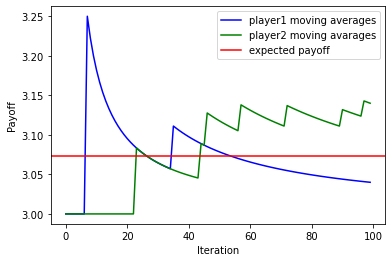

In [80]:
#Use histpay to generate moving average list
player1.ma = movAve(player1.histpay)
player2.ma = movAve(player2.histpay)
#Plot ma(s) against the expected payoff
plt.plot(player1.ma, color='blue')
plt.plot(player2.ma, color='green')
plt.axhline(expected_payoff, color='red')
plt.legend(['player1 moving averages','player2 moving avarages','expected payoff'])
plt.xlabel('Iteration')
plt.ylabel('Payoff')
#Summary
print(f'The expected payoff is: {round(expected_payoff,2)} \n')
print(f'After {len(inter_count)} iterations, the simulation result seems to match with the expected payoff due to the law of large number.')